# Overview

### Source:

The data set was contributed to the benchmark collection by Terry Sejnowski, now at the Salk Institute and the University of California at San Deigo. The data set was developed in collaboration with R. Paul Gorman of Allied-Signal Aerospace Technology Center.

### Data Set Information:

The file "sonar.mines" contains 111 patterns obtained by bouncing sonar signals off a metal cylinder at various angles and under various conditions. The file "sonar.rocks" contains 97 patterns obtained from rocks under similar conditions. The transmitted sonar signal is a frequency-modulated chirp, rising in frequency. The data set contains signals obtained from a variety of different aspect angles, spanning 90 degrees for the cylinder and 180 degrees for the rock.

Each pattern is a set of 60 numbers in the range 0.0 to 1.0. Each number represents the energy within a particular frequency band, integrated over a certain period of time. The integration aperture for higher frequencies occur later in time, since these frequencies are transmitted later during the chirp.

The label associated with each record contains the letter "R" if the object is a rock and "M" if it is a mine (metal cylinder). The numbers in the labels are in increasing order of aspect angle, but they do not encode the angle directly.

# Let's Work 

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 

In [2]:
# Reading the dataset

data = pd.read_csv('C:\\Users\\dell\\Desktop\\sonar.all-data.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 61 columns):
0.0200    207 non-null float64
0.0371    207 non-null float64
0.0428    207 non-null float64
0.0207    207 non-null float64
0.0954    207 non-null float64
0.0986    207 non-null float64
0.1539    207 non-null float64
0.1601    207 non-null float64
0.3109    207 non-null float64
0.2111    207 non-null float64
0.1609    207 non-null float64
0.1582    207 non-null float64
0.2238    207 non-null float64
0.0645    207 non-null float64
0.0660    207 non-null float64
0.2273    207 non-null float64
0.3100    207 non-null float64
0.2999    207 non-null float64
0.5078    207 non-null float64
0.4797    207 non-null float64
0.5783    207 non-null float64
0.5071    207 non-null float64
0.4328    207 non-null float64
0.5550    207 non-null float64
0.6711    207 non-null float64
0.6415    207 non-null float64
0.7104    207 non-null float64
0.8080    207 non-null float64
0.6791    207 non-null floa

In [4]:
data.head()

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R


In [5]:
print("Total Columns : ", len(data.columns))

Total Columns :  61


In [6]:
# Total Labels
data[data.columns[60]].value_counts()

M    111
R     96
Name: R, dtype: int64

## Input and Output Data

In [7]:
X = data[data.columns[0:60]].values
y = data[data.columns[60]].values

In [8]:
print(X.shape)

(207, 60)


## Using OneHotEncoder

In [9]:
def one_hot_encode(labels):
    n_labels = len(labels)
    n_unique_labels = len(np.unique(labels))
    one_hot_encode = np.zeros((n_labels,n_unique_labels))
    one_hot_encode[np.arange(n_labels), labels] = 1
    return one_hot_encode

In [10]:
encoder = LabelEncoder()
encoder.fit(y)
y = encoder.transform(y)
Y = one_hot_encode(y)

In [11]:
encoder = LabelEncoder()
encoder.fit(y)
y = encoder.transform(y)

Y = one_hot_encode(y)

In [12]:
Y[0]

array([ 0.,  1.])

## Training and Testing Data

As our output column has labels arranged together, so we first shuffle our data

In [13]:
X,Y = shuffle (X, Y, random_state = 0)

In [14]:
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size = 0.20, random_state = 0)

In [15]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)

(165, 60)
(165, 2)
(42, 60)


# Neural Net Model

In [16]:
learning_rate = 0.2
training_epochs = 500

In [17]:
n_dim = X.shape[1]
print("n_dim = ", n_dim)

n_class = 2

n_dim =  60


In [18]:
cost_history = np.empty(shape=[1],dtype=float)

## 4 layer Dense Neural Networks

In [19]:
n_hidden_1 = 60
n_hidden_2 = 60
n_hidden_3 = 60
n_hidden_4 = 60

In [20]:
x = tf.placeholder(tf.float32, [None, n_dim])
W = tf.Variable(tf.zeros([n_dim, n_class]))
b = tf.Variable(tf.zeros([n_class]))
y_ = tf.placeholder(tf.float32, [None, n_class])

In [21]:
# Define the model
def multilayer_perceptron(x, weights, biases):
 
    # Hidden layer with RELU activationsd
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)
 
    # Hidden layer with sigmoid activation
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
 
    # Hidden layer with sigmoid activation
    layer_3 = tf.add(tf.matmul(layer_2, weights['h3']), biases['b3'])
    layer_3 = tf.nn.relu(layer_3)
 
    # Hidden layer with RELU activation
    layer_4 = tf.add(tf.matmul(layer_3, weights['h4']), biases['b4'])
    layer_4 = tf.nn.sigmoid(layer_4)
 
    # Output layer with linear activation
    out_layer = tf.matmul(layer_4, weights['out']) + biases['out']
    return out_layer
 

In [22]:
# Define the weights for each layers
 
weights = {
    'h1': tf.Variable(tf.truncated_normal([n_dim, n_hidden_1])),
    'h2': tf.Variable(tf.truncated_normal([n_hidden_1, n_hidden_2])),
    'h3': tf.Variable(tf.truncated_normal([n_hidden_2, n_hidden_3])),
    'h4': tf.Variable(tf.truncated_normal([n_hidden_3, n_hidden_4])),
    'out': tf.Variable(tf.truncated_normal([n_hidden_4, n_class]))
}

In [23]:
# Define the bias for each layers

biases = {
    'b1': tf.Variable(tf.truncated_normal([n_hidden_1])),
    'b2': tf.Variable(tf.truncated_normal([n_hidden_2])),
    'b3': tf.Variable(tf.truncated_normal([n_hidden_3])),
    'b4': tf.Variable(tf.truncated_normal([n_hidden_4])),
    'out': tf.Variable(tf.truncated_normal([n_class]))
}

In [24]:
init = tf.global_variables_initializer()

In [25]:
# Calling model
y = multilayer_perceptron(x, weights, biases)

## Cost Function

In [26]:
cost_function = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y, labels=y_))
training_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost_function)


## Initializing Session

In [27]:
sess = tf.Session()
sess.run(init) 

In [28]:
mse_history = []
accuracy_history = []

## Training Model

In [29]:
for epoch in range(training_epochs):
    sess.run(training_step, feed_dict = {x: train_x, y_: train_y})
    cost = sess.run(cost_function, feed_dict={x: train_x, y_: train_y})
    cost_history = np.append(cost_history, cost)
    correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    pred_y = sess.run(y, feed_dict = {x: test_x})
    mse = tf.reduce_mean(tf.square(pred_y - test_y))
    mse_ = sess.run(mse)
    mse_history.append(mse_)
    accuracy = (sess.run(accuracy, feed_dict={x: train_x, y_: train_y}))
    accuracy_history.append(accuracy)
    
    if epoch % 50 == 0:
        print('epoch : ', epoch, ' ; ', 'cost: ', cost, " ; MSE: ", mse_, "- Train Accuracy: ", accuracy )
 

epoch :  0  ;  cost:  2.15269  ; MSE:  7.35734533211 - Train Accuracy:  0.569697
epoch :  50  ;  cost:  1.41453  ; MSE:  3.94927748265 - Train Accuracy:  0.569697
epoch :  100  ;  cost:  1.11135  ; MSE:  4.45480682617 - Train Accuracy:  0.593939
epoch :  150  ;  cost:  0.923573  ; MSE:  8.57367284895 - Train Accuracy:  0.642424
epoch :  200  ;  cost:  0.32742  ; MSE:  10.4097010121 - Train Accuracy:  0.866667
epoch :  250  ;  cost:  0.239389  ; MSE:  9.07412091095 - Train Accuracy:  0.915152
epoch :  300  ;  cost:  0.236653  ; MSE:  8.45003876253 - Train Accuracy:  0.909091
epoch :  350  ;  cost:  0.151517  ; MSE:  10.5186103743 - Train Accuracy:  0.939394
epoch :  400  ;  cost:  0.245745  ; MSE:  11.0529434504 - Train Accuracy:  0.872727
epoch :  450  ;  cost:  0.129005  ; MSE:  10.4703381429 - Train Accuracy:  0.957576


## Cost Graph

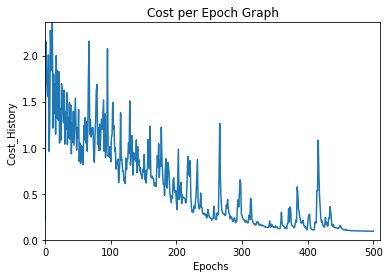

In [30]:
plt.plot(range(len(cost_history)), cost_history)
plt.xlabel('Epochs ')
plt.ylabel('Cost_History ')
plt.title("Cost per Epoch Graph")
plt.xlim(0, training_epochs + 10)
plt.ylim(0, np.max(cost_history))
plt.rcParams['figure.figsize'] = [12, 5]
plt.show()

# Accuracy Graph

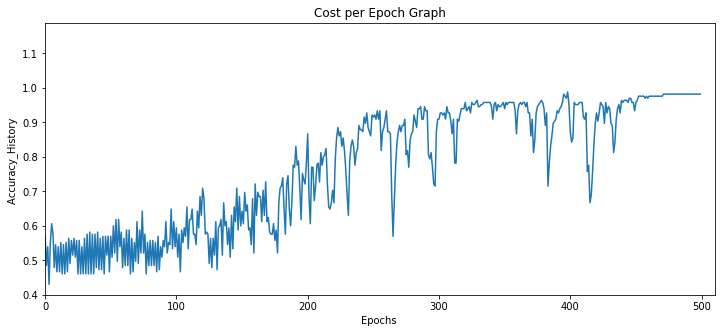

In [31]:
plt.plot(range(len(accuracy_history)), accuracy_history)
plt.xlabel('Epochs ')
plt.ylabel('Accuracy_History ')
plt.title("Cost per Epoch Graph")
plt.xlim(0, training_epochs + 10)
plt.ylim(0.4, np.max(accuracy_history)+0.2)
plt.rcParams['figure.figsize'] = [12, 5]
plt.show()

### Accuracy

In [32]:
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print("Test Accuracy: ", (sess.run(accuracy, feed_dict={x: test_x, y_: test_y})))

Test Accuracy:  0.857143


### Mean Square Error

In [33]:
pred_y = sess.run(y, feed_dict={x: test_x})
mse = tf.reduce_mean(tf.square(pred_y - test_y))
print("MSE: %.4f" % sess.run(mse))

MSE: 11.4271


.

Thanks for having a look. If u like the Deep Neural Network approach, Pls give a LIKE to my kernel :)